# Tarea 5. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 10.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [1]:
# Importar matplotlib.pyplot, pandas y numpy
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


Text(0.2298, 0.1497, 'Japon')

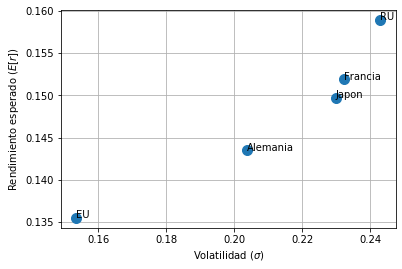

In [4]:
import matplotlib.pyplot as plt
x_points=annual_ret_summ.T.loc[:,'Volatilidad']
y_points=annual_ret_summ.T.loc[:,'Media']

# Ventana para graficar
plt.figure(figsize=(6,4))

# Graficar puntos
plt.plot(x_points,y_points,'o',ms=10)
plt.grid()

# Etiquetas de los ejes
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')

# Etiqueta de cada instrumento
plt.text(x_points[0], y_points[0],annual_ret_summ.T.index[0])
plt.text(x_points[1], y_points[1],annual_ret_summ.T.index[1])
plt.text(x_points[2], y_points[2],annual_ret_summ.T.index[2])
plt.text(x_points[3], y_points[3],annual_ret_summ.T.index[3])
plt.text(x_points[4], y_points[4],annual_ret_summ.T.index[4])

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).


In [5]:
# Vector de w variando entre 0 y 1 con N pasos
N = 101
w = np.linspace(start=0, stop=1, num=N)
# Rendimientos esperados individuales
# Activo1: EU, Activo2:Japon
E1 = annual_ret_summ.loc['Media', 'RU']
E2 = annual_ret_summ.loc['Media', 'Japon']
# Volatilidades individuales
s1 = annual_ret_summ.loc['Volatilidad', 'RU']
s2 = annual_ret_summ.loc['Volatilidad', 'Japon']
# Correlacion
r12 = corr.loc['EU', 'Japon']
E1, E2, s1, s2, r12

(0.1589, 0.1497, 0.243, 0.2298, 0.2663)

### Dataframe

In [6]:
# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios2 = pd.DataFrame({'w':w,
                            'Media' : w*E1 + (1-w) *E2, 
                            'Volatilidad' : ((w*s1)**2 + ((1-w)*s2)**2 + 2*w*(1-w)*s1*s2*r12)**.5
                            },
                           index=range(1, N+1)
                           )
portafolios2

,w,Media,Volatilidad
1,0.00,0.149700,0.229800
2,0.01,0.149792,0.228161
3,0.02,0.149884,0.226547
4,0.03,0.149976,0.224957
5,0.04,0.150068,0.223393
...,...,...,...
97,0.96,0.158532,0.235894
98,0.97,0.158624,0.237639
99,0.98,0.158716,0.239405
100,0.99,0.158808,0.241192


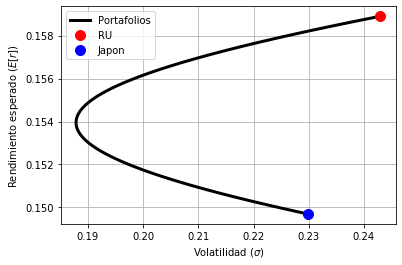

In [7]:
# Graficar el lugar geométrico de los portafolios en el
# espacio rendimiento esperado vs. volatilidad.
# Especificar también los puntos relativos a los casos
# extremos.
plt.figure(figsize=(6,4))
plt.plot(portafolios2['Volatilidad'],
         portafolios2['Media'],
         'k', lw=3, label='Portafolios'
        )
plt.plot(s1, E1, 'or', ms=10, label='RU')
plt.plot(s2, E2, 'ob', ms=10, label='Japon')
plt.legend(loc='best')
plt.grid()
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.show()

### 2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [8]:
# Calcular w_minvar y mostrar...
s12 = r12 * s1 * s2
w_minvar = (s2**2 - s12) / (s1**2 + s2**2 - 2*s12)
w_minvar, 1-w_minvar

#por que asociamos w al índice 1 y (w-1) al indice dos

(0.461999081708774, 0.538000918291226)

In [9]:
def varianza(w,s1,s2,s12):
    w1=w[0]
    w2=w[1]
    return (s1*w1)**2+(s2*w2)**2+2*w1*w2*s12

In [10]:
E_minvar = w_minvar * E1 + (1 - w_minvar) * E2
s_minvar = varianza([w_minvar, 1 - w_minvar], s1, s2, s12)**0.5
E_minvar, s_minvar

(0.15395039155172074, 0.18783226907134618)

## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [11]:
# Vector de w variando entre 0 y 1 con N pasos
N = 101
w = np.linspace(start=0, stop=1, num=N)
# Rendimientos esperados individuales
# Activo1: Japon, Activo2:RU
E1V = annual_ret_summ.loc['Media', 'Japon']
E2V = annual_ret_summ.loc['Media', 'RU']
# Volatilidades individuales
s1V = annual_ret_summ.loc['Volatilidad', 'Japon']
s2V = annual_ret_summ.loc['Volatilidad', 'RU']
# Correlacion
r12V = 0.5
E1, E2, s1, s2, r12

(0.1589, 0.1497, 0.243, 0.2298, 0.2663)

In [12]:
# Crear un DataFrame cuyas columnas sean rendimiento esperado
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios2V = pd.DataFrame({'w': w,
                             'Media': w * E1V + (1 - w) * E2V,
                             'Volatilidad': ((w * s1V)**2 + ((1 - w) * s2V)**2 + 2 * w * (1 - w) * s1V * s2V * r12V)**0.5
                            },
                            index=range(1, N + 1)
                           )
portafolios2V.index.name = 'Port. #'
portafolios2V.head(10)

,w,Media,Volatilidad
Port. #,,,
1,0.00,0.158900,0.243000
2,0.01,0.158808,0.241727
3,0.02,0.158716,0.240471
4,0.03,0.158624,0.239232
5,0.04,0.158532,0.238009
6,0.05,0.158440,0.236804
7,0.06,0.158348,0.235617
8,0.07,0.158256,0.234447
9,0.08,0.158164,0.233296


In [13]:
# Calcular w_minvar y mostrar...
s12V = r12V * s1V * s2V
w_minvarV = (s2V**2 - s12V) / (s1V**2 + s2V**2 - 2*s12V)
w_minvarV, 1-w_minvarV

#por que asociamos w al índice 1 y (w-1) al indice dos

(0.5557072988900957, 0.44429270110990426)

In [14]:
E_minvarV = w_minvarV * E1V + (1 - w_minvarV) * E2V
s_minvarV = varianza([w_minvarV, 1 - w_minvarV], s1V, s2V, s12V)**0.5
E_minvarV, s_minvarV

(0.15378749285021112, 0.2043300675083318)

## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

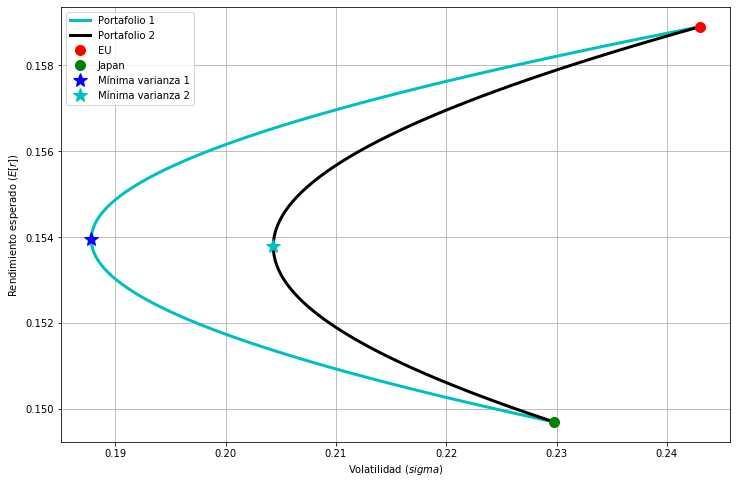

In [34]:
plt.figure(figsize=(12,8))

plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')

plt.plot(portafolios2['Volatilidad'],
        portafolios2['Media'],
        'c' , lw=3, label='Portafolio 1 '
        )
plt.plot(portafolios2V['Volatilidad'],
        portafolios2V['Media'],
        'black', lw=3, label='Portafolio 2'
        )


plt.plot(s1, E1, 'or', ms=10, label='EU')
plt.plot(s2, E2, 'og', ms=10, label='Japan')

plt.plot(s_minvar, E_minvar, '*b', ms=15, label='Mínima varianza 1')
plt.plot(s_minvarV, E_minvarV, '*c', ms=15, label='Mínima varianza 2')


plt.legend(loc='best')
plt.grid()
plt.show()

¿Cuál provee más diversificación?
El primero, el que no tiene 5% de covarianza. El portafolio que más diversificación tiene es el que tiene la correlación directa entre los dos activos ya que tiene una mayor frontera de minima varianza.

¿Cómo se diferencian?
Se pueden diferenciar por que su diversificación implica que en un mimso rendimiento cuenta con una volatilidad menor en todos los puntos de la gráfica.

¿Son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?
Sí, el primer portafolio se encuentra mucho más cerca del punto de eliminación total de riesgo.

¿Cómo puede explicar esta diferencia?
Una mayor correlación va a implicar un mayor riesgo pues por definición esta diversificación es menos significativa.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>